# Sine Wave Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data

Let's use Numpy to create a simple sine wave.

In [2]:
# linspace is an in-built function in Python’s NumPy library. 
# It is used to create an evenly spaced sequence in a specified interval.

# np.linspace(start, stop, num = 50, endpoint = True, retstep = False, dtype = None)

# start  : [optional] start of interval range. By default start = 0
# stop   : end of interval range
# retstep : If True, return (samples, step). By deflut restep = False
# num    : [int, optional] No. of samples to generate
# dtype  : type of output array

# Return :
# ndarray
# step : [float, optional], if restep = True


In [3]:
x = np.linspace(0, 50, num = 501)
y = np.sin(x)

In [4]:
#x

In [5]:
#y

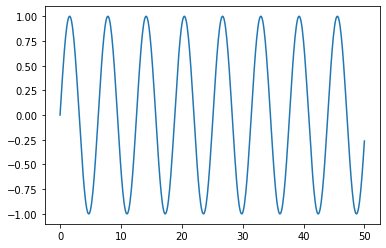

In [6]:
plt.plot(x, y)
plt.show()

#Let's turn this into a DataFrame

In [7]:
# df = pd.DataFrame(data = x ,columns = ['x'])
# df
# df['Sine'] = pd.DataFrame(data = y)
# df

In [8]:
df = pd.DataFrame(data = y, index = x, columns = ['Sine'])
df.head(5)

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


## Train Test Split

Note! This is very different from our usual test/train split methodology!

In [9]:
# take last points

In [10]:
len(df)

501

In [11]:
test_percent = 0.1 #10%

In [12]:
len(df)*test_percent

50.1

In [13]:
test_point = np.round(len(df)*test_percent)
test_point
# 10% of indices of tatal dataset are 50 indices

50.0

In [14]:
#test_point = np.round((len(df)*10)/100)

In [15]:
# Now lets take last points
test_ind = int(len(df)-test_point)

In [16]:
test_ind

451

In [17]:
# Now split into Training and Test data
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [18]:
train.head(5)

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [19]:
test.head(5)

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


## Scale Data

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler =  MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [22]:
#scaler = MinMaxScaler()

In [23]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
#scaler.fit(train)

In [24]:
# scaled_train = scaler.transform(train)
# scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [25]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [26]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, #X_train
                                scaled_train, #y_train
                                length = length, 
                                batch_size = batch_size)

In [27]:
len(scaled_train)

451

In [28]:
len(generator) # n_input = 2

449

In [29]:
# scaled_train

In [30]:
X, y = generator[0]

In [31]:
# What does the first batch look like?
X,y = generator[0]

In [32]:
X

array([[[0.49999912],
        [0.54991622]]])

In [33]:
y

array([[0.59933458]])

In [34]:
print(f'Given the Array: \n{X.flatten()}')
print("\n")
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622]


Predict this y: 
 [[0.59933458]]


In [35]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 10 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = 1)

In [36]:
# What does the first batch look like?
X,y = generator[0]

In [37]:
print(f'Given the Array: \n{X.flatten()}')
print("\n")
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622 0.59933458 0.64776041 0.69470985 0.73971381
 0.78232262 0.82211054 0.85868004 0.89166571]


Predict this y: 
 [[0.92073798]]


In [38]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = 1)

Now you will be able to edit the length so that it makes sense for your time series!

### Create the Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [40]:
# We're only using one feature in our time series
n_features = 1

In [41]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(50,input_shape = (length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [43]:
# fit model
model.fit_generator(generator,epochs = 5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
401/401 [==============================] - 29s 72ms/step - loss: 0.0041
Epoch 2/5
401/401 [==============================] - 28s 71ms/step - loss: 3.1267e-05
Epoch 3/5
401/401 [==============================] - 27s 68ms/step - loss: 7.7219e-05
Epoch 4/5
401/401 [==============================] - 24s 59ms/step - loss: 3.3208e-04
Epoch 5/5
401/401 [==============================] - 27s 66ms/step - loss: 2.2072e-04


In [44]:
model.history.history.keys()

dict_keys(['loss'])

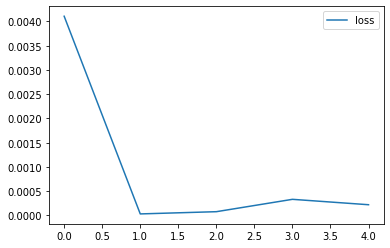

In [45]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

## Evaluate on Test Data

In [46]:
first_eval_batch = scaled_train[-length:]

In [47]:
first_eval_batch[:6]

array([[0.83740582],
       [0.7988817 ],
       [0.75737124],
       [0.7132892 ],
       [0.66707605],
       [0.61919351]])

In [48]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [49]:
model.predict(first_eval_batch)

array([[0.95063376]], dtype=float32)

In [50]:
scaled_test[0]

array([0.94955134])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [51]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [52]:
current_batch.shape

(1, 50, 1)

In [53]:
current_batch[:,45:,:]

array([[[0.78958345],
        [0.82882972],
        [0.86479041],
        [0.89710623],
        [0.92545429]]])

In [54]:
#np.append(current_batch[:,1:,:],[[[99]]],axis=1) #[99] a random value

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [55]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
#current_batch.shape
#np.append(current_batch[:,1:,:],[[[99]]],axis=1)

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

In [56]:
test_predictions[:6]

[array([0.95063376], dtype=float32),
 array([0.9700786], dtype=float32),
 array([0.98520863], dtype=float32),
 array([0.99515224], dtype=float32),
 array([1.0001458], dtype=float32),
 array([1.0002937], dtype=float32)]

In [57]:
scaled_test[:6]

array([[0.94955134],
       [0.96915662],
       [0.98407422],
       [0.99415511],
       [0.99929856],
       [0.99945317]])

## Inverse Transformations and Compare

In [58]:
true_predictions = scaler.inverse_transform(test_predictions)

In [59]:
true_predictions[:6]

array([[0.90126206],
       [0.9401514 ],
       [0.97041124],
       [0.99029829],
       [1.00028533],
       [1.0005812 ]])

In [60]:
test.head(5)

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


In [61]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

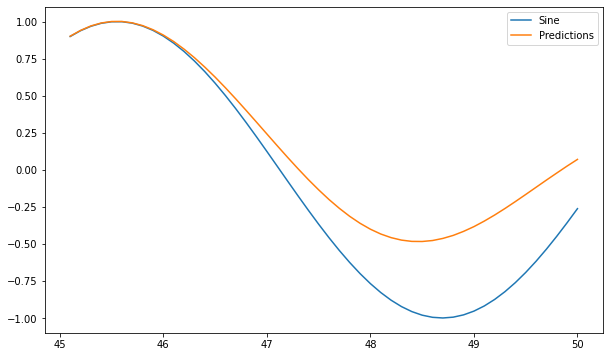

In [62]:
test.plot(figsize = (10,6))
plt.show()

## Adding in Early Stopping and Validation Generator

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stop = EarlyStopping(monitor = 'val_loss',patience = 2)

In [65]:
length = 40
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length = length,batch_size = 1)


validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length = length,batch_size = 1)

# LSTMS

In [66]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [67]:
model.fit_generator(generator,epochs=20,
                   validation_data = validation_generator,
                   callbacks = [early_stop])

Epoch 1/20
411/411 [==============================] - 3s 8ms/step - loss: 0.0224 - val_loss: 3.9906e-05
Epoch 2/20
411/411 [==============================] - 2s 6ms/step - loss: 1.6193e-04 - val_loss: 2.8848e-05
Epoch 3/20
411/411 [==============================] - 3s 6ms/step - loss: 2.0413e-04 - val_loss: 1.5917e-04
Epoch 4/20
411/411 [==============================] - 3s 6ms/step - loss: 1.6885e-04 - val_loss: 1.3722e-05
Epoch 5/20
411/411 [==============================] - 3s 6ms/step - loss: 9.4739e-05 - val_loss: 4.9301e-05
Epoch 6/20
411/411 [==============================] - 2s 6ms/step - loss: 3.7987e-04 - val_loss: 3.1790e-06
Epoch 7/20
411/411 [==============================] - 2s 6ms/step - loss: 3.5585e-05 - val_loss: 1.7573e-05
Epoch 8/20
411/411 [==============================] - 2s 6ms/step - loss: 8.4573e-05 - val_loss: 1.7654e-07
Epoch 9/20
411/411 [==============================] - 3s 7ms/step - loss: 1.1247e-04 - val_loss: 3.7171e-06
Epoch 10/20
411/411 [===========

In [68]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

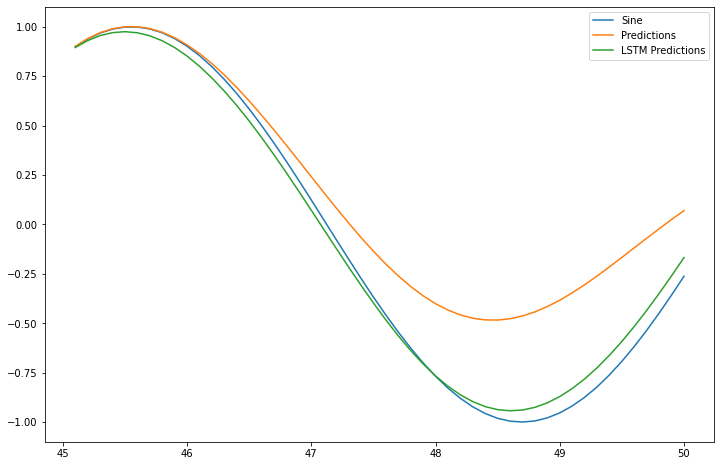

In [69]:
# IGNORE WARNINGS
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize = (12,8))
plt.show()

# Forecasting

Forecast into unknown range. We should first utilize all our data, since we are now forecasting! Meaning beyond 50 (data we took upto 50 earlier, see df.plot()

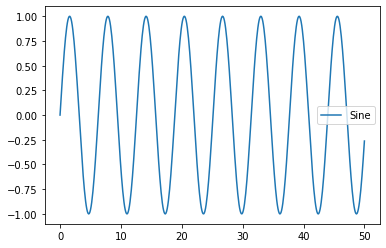

In [70]:
df.plot()
# plt.plot(x, y)
plt.show()

In [71]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [72]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [73]:
model = Sequential()
model.add(LSTM(50, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit_generator(generator, epochs = 6)

Epoch 1/6
451/451 [==============================] - 4s 9ms/step - loss: 0.0101
Epoch 2/6
451/451 [==============================] - 3s 7ms/step - loss: 3.2905e-04
Epoch 3/6
451/451 [==============================] - 3s 7ms/step - loss: 2.3619e-04
Epoch 4/6
451/451 [==============================] - 3s 7ms/step - loss: 3.7534e-04
Epoch 5/6
451/451 [==============================] - 3s 7ms/step - loss: 1.4127e-04
Epoch 6/6
451/451 [==============================] - 3s 8ms/step - loss: 1.0141e-04


In [74]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(100):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [75]:
forecast = scaler.inverse_transform(forecast)

In [76]:
forecast[:6]

array([[-0.18642642],
       [-0.08916982],
       [ 0.00828758],
       [ 0.10529408],
       [ 0.20107249],
       [ 0.29477632]])

In [77]:
df.head(3)

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669


In [78]:
len(forecast)

100

In [79]:
100*0.1 #0.1 is the step size in original data

10.0

In [80]:
50.1+10


60.1

In [81]:
#np.arange(start, stop, step)

forecast_index = np.arange(50.1,60.1,step=0.1)

#50.1=is starting point if we have to plot on original data 
#since 50 is the last point on original data with '0.1' step size, then add 5.0 (as calculated in 50*0.1) for stope point, 
#step size is 0.1

In [82]:
len(forecast_index)

100

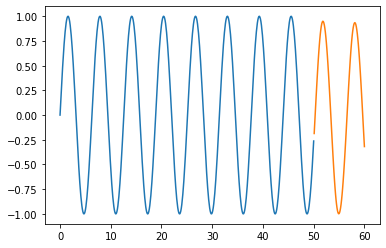

In [83]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)
plt.show()